In [1]:
import json
import pickle
import pandas as pd
import matplotlib.pyplot as plt

0: sample; 1: air

In [6]:
def get_dataframe(matrix, dir="raki", save_xlsx=False):
    with open(f"raw_data_{dir}/matrix_{matrix}/{matrix}.bmerawdata") as f:
        j = json.load(f)
    column_names = [el["name"] for el in j["rawDataBody"]["dataColumns"]]
    df = pd.DataFrame(j["rawDataBody"]["dataBlock"], columns=column_names)

    if save_xlsx:
        df.to_excel(f"raw_data_{dir}/matrix_{matrix}/{matrix}.xlsx")

    return df

In [47]:
# df = get_dataframe(1, save_xlsx=True)

In [8]:
def build_sensor_data(df):
    df["Date"] = pd.to_datetime(
        df["Real time clock"],
        unit="s",
        utc=True).map(lambda x: x.tz_convert("Europe/Istanbul"))
    df["Date"] = df["Date"].dt.tz_localize(None)

    sensor_indexes = sorted(df["Sensor Index"].unique())

    sensors = {}
    for i in sensor_indexes:
        sensors[i] = {}
        sensor = df[df["Sensor Index"] == i]
        heater_indexes = sorted(sensor["Heater Profile Step Index"].unique())
        for j in heater_indexes:
            sensors[i][j] = sensor[sensor["Heater Profile Step Index"] == j]

    return sensors

In [9]:
def build_raw_data_pickle(dir="raki", save_pickle=False):
    sensor_data = {}
    for matrix in range(2):
        df = get_dataframe(matrix)
        sensor_data[f"mat_{matrix}"] = build_sensor_data(df)

    if save_pickle:
        with open(f"raw_sensor_data_{dir}.pkl", "wb") as f:
            pickle.dump(sensor_data, f)

    return sensor_data

In [10]:
sensor_data = build_raw_data_pickle(dir="raki", save_pickle=True)

In [11]:
sensor_data["mat_0"][0][0]

,Sensor Index,Sensor ID,Time Since PowerOn,Real time clock,Temperature,Pressure,Relative Humidity,Resistance Gassensor,Heater Profile Step Index,Scanning Mode Enabled,Scanning Cycle Index,Label Tag,Error Code,Date
0,0,355899974,6722,1766390433,16.165739,921.768982,42.466602,6699652.5,0,1,1,0,0,2025-12-22 11:00:33
77,0,355899974,24960,1766390452,20.621099,921.865967,36.462456,102400000.0,0,1,1,0,0,2025-12-22 11:00:52
161,0,355899974,43298,1766390470,21.773853,921.837341,33.717045,102400000.0,0,1,1,0,0,2025-12-22 11:01:10
240,0,355899974,61488,1766390488,22.600784,921.844666,32.120434,102400000.0,0,1,1,0,0,2025-12-22 11:01:28
326,0,355899974,79758,1766390506,23.353668,921.825623,31.005409,102400000.0,0,1,1,0,0,2025-12-22 11:01:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78127,0,355899974,17393553,1766407822,36.874603,921.138000,19.238089,102400000.0,0,1,1,0,0,2025-12-22 15:50:22
78213,0,355899974,17411894,1766407841,36.864727,921.133423,19.258295,102400000.0,0,1,1,0,0,2025-12-22 15:50:41
78293,0,355899974,17430355,1766407859,36.933857,921.129517,19.194944,102400000.0,0,1,1,0,0,2025-12-22 15:50:59
78372,0,355899974,17448824,1766407878,36.923981,921.137085,19.111080,102400000.0,0,1,1,0,0,2025-12-22 15:51:18


In [12]:
def plot_sensor(matrix, sensor_idx, sensor_data):
    plt.figure(figsize=(8, 4))
    plt.title(f"Matrix {matrix}, Sensor {sensor_idx}")
    plt.yscale("log")
    for hp_idx, val in sensor_data[f"mat_{matrix}"][sensor_idx].items():
        resistance = val["Resistance Gassensor"].values
        time_ms = val["Time Since PowerOn"].values
        plt.plot(time_ms, resistance, label=f"HP {hp_idx}")
    plt.legend()
    plt.show()

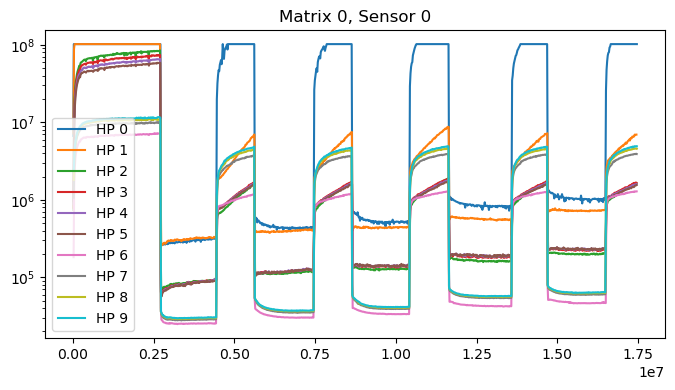

In [13]:
plot_sensor(0, 0, sensor_data)

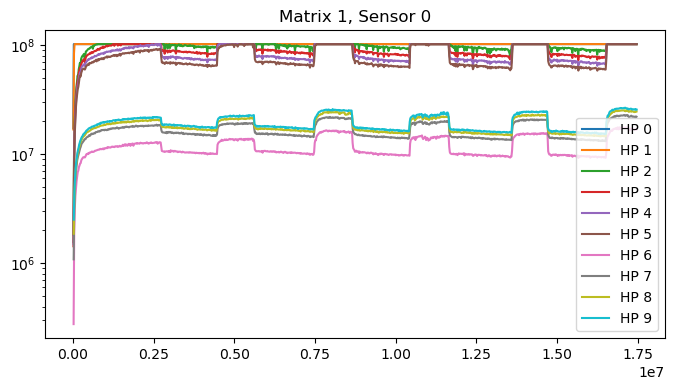

In [14]:
plot_sensor(1, 0, sensor_data)